x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
10000/10000 [==============================] - 1s 104us/step
Test loss: 0.46083946466743947
Test accuracy: 0.8746


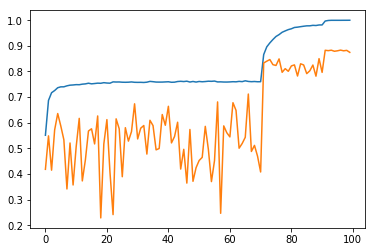

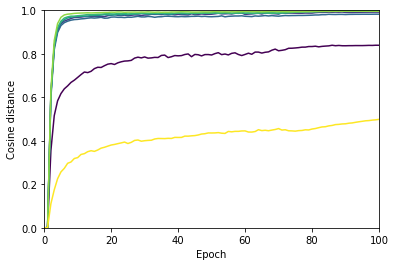

In [8]:
'''
Code inspired by keras cifar10_cnn.py example https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
'''
%matplotlib inline
import mpld3
mpld3.enable_notebook()

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.callbacks import LearningRateScheduler
import os

import matplotlib.pyplot as plt

from layer_rotation_control import SGD
from layer_rotation_monitoring import LayerRotationCurves

batch_size = 32
num_classes = 10
epochs = 100
verbose = 0

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

lr = 3**-3
opt = SGD(lr, layca = True)

# a keras callback to record layer rotation
lrc = LayerRotationCurves()

# learning rate schedule: divide learning rate by 5 at epochs 70 and 90
def schedule(epoch):
    new_lr = lr
    if epoch > 70:
        new_lr *= 0.2
    if epoch >90:
        new_lr *= 0.2
    return new_lr
lrs = LearningRateScheduler(schedule)

callbacks = [lrc, lrs]

# Let's train the model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True,
                    callbacks = callbacks,
                    verbose = verbose)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# plot training curves
plt.figure()
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])

# plot layer rotation curves
plt.figure()
lrc.plot()